### 1. Imports

In [1]:
# Import libraries
import gym
import numpy as np
from stable_baselines.common.policies import MlpPolicy
from stable_baselines import PPO2, A2C
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



c:\users\patri\documents\github\reinforcementlearninginventorymanagement\venv_37\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
# Import classes
from rl_environment import Environment

### Environment creation

In [3]:
# Parameters
number_of_regional_warehouses = 1
max_inventory_amount_regional_warehouses = 25
max_inventory_amount_central_warehouse = 100
customer_demand_per_step = 1
simulation_length = 60
lead_time = 2

In [4]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time)

Simulation created with the following parameters:
------------------------------------------------------------
central_warehouse ; Inventory: 33
regional_warehouse_1 ; ID: 1 ; Inventory: 8 ; Demand: 1 ; Lost sales: 0
------------------------------------------------------------


### RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [5]:
ppo_model = PPO2(MlpPolicy, env, verbose=1)
ppo_model.learn(total_timesteps=50000)

Wrapping the env in a DummyVecEnv.




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



--------------------------------------
| approxkl           | 1.5874724e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0188        |
| fps                | 448           |
| n_updates          | 1             |
| policy_entropy     | 0.69313216    |
| policy_loss        | -0.001590561  |
| serial_timesteps   | 128           |
| time_elapsed       | 0             |
| total_timesteps    | 128           |
| value_loss         | 4.1576657     |
--------------------------------------
---------------------------------------
| approxkl           | 1.1643081e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.0271        |
| fps                | 1334           |
| n_updates         

--------------------------------------
| approxkl           | 1.3646236e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.204        |
| fps                | 788           |
| n_updates          | 9             |
| policy_entropy     | 0.6913745     |
| policy_loss        | 9.0323156e-05 |
| serial_timesteps   | 1152          |
| time_elapsed       | 0.966         |
| total_timesteps    | 1152          |
| value_loss         | 0.8167707     |
--------------------------------------
--------------------------------------
| approxkl           | 5.084106e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.104        |
| fps                | 1484          |
| n_updates          | 10            |
| policy_entropy     | 0.6913723     |
| policy_loss        | -0.0011071885 |
| serial_timesteps   | 1280          |
| time_elapsed       | 1.13          |
| total_timesteps    | 1280          |
| value_loss         | 0.5200005     |
-------------------------

--------------------------------------
| approxkl           | 0.00011417032 |
| clipfrac           | 0.0           |
| explained_variance | 0.252         |
| fps                | 1559          |
| n_updates          | 26            |
| policy_entropy     | 0.64693916    |
| policy_loss        | -0.0020706719 |
| serial_timesteps   | 3328          |
| time_elapsed       | 2.57          |
| total_timesteps    | 3328          |
| value_loss         | 5.298985      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00021449073 |
| clipfrac           | 0.0           |
| explained_variance | 0.325         |
| fps                | 1507          |
| n_updates          | 27            |
| policy_entropy     | 0.6298022     |
| policy_loss        | -0.0019655782 |
| serial_timesteps   | 3456          |
| time_elapsed       | 2.65          |
| total_timesteps    | 3456          |
| value_loss         | 2.258494      |
-------------------------

--------------------------------------
| approxkl           | 5.508894e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.122         |
| fps                | 1112          |
| n_updates          | 43            |
| policy_entropy     | 0.49950257    |
| policy_loss        | -0.0016501764 |
| serial_timesteps   | 5504          |
| time_elapsed       | 4.07          |
| total_timesteps    | 5504          |
| value_loss         | 9.362024      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00010473396 |
| clipfrac           | 0.0           |
| explained_variance | 0.309         |
| fps                | 1295          |
| n_updates          | 44            |
| policy_entropy     | 0.48365757    |
| policy_loss        | -0.0005612846 |
| serial_timesteps   | 5632          |
| time_elapsed       | 4.18          |
| total_timesteps    | 5632          |
| value_loss         | 8.012033      |
-------------------------

--------------------------------------
| approxkl           | 4.1904455e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.125         |
| fps                | 1536          |
| n_updates          | 60            |
| policy_entropy     | 0.47481716    |
| policy_loss        | -0.0013255039 |
| serial_timesteps   | 7680          |
| time_elapsed       | 5.6           |
| total_timesteps    | 7680          |
| value_loss         | 23.569742     |
--------------------------------------
---------------------------------------
| approxkl           | 5.042032e-05   |
| clipfrac           | 0.0            |
| explained_variance | -0.0171        |
| fps                | 1535           |
| n_updates          | 61             |
| policy_entropy     | 0.48605698     |
| policy_loss        | -0.00033411907 |
| serial_timesteps   | 7808           |
| time_elapsed       | 5.68           |
| total_timesteps    | 7808           |
| value_loss         | 17.347233      |
-------------

--------------------------------------
| approxkl           | 0.00014653218 |
| clipfrac           | 0.0           |
| explained_variance | 0.0595        |
| fps                | 1536          |
| n_updates          | 77            |
| policy_entropy     | 0.45472863    |
| policy_loss        | -0.0021245515 |
| serial_timesteps   | 9856          |
| time_elapsed       | 7.03          |
| total_timesteps    | 9856          |
| value_loss         | 18.998821     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00023517627 |
| clipfrac           | 0.0           |
| explained_variance | 0.145         |
| fps                | 1535          |
| n_updates          | 78            |
| policy_entropy     | 0.44445553    |
| policy_loss        | -0.0028871032 |
| serial_timesteps   | 9984          |
| time_elapsed       | 7.11          |
| total_timesteps    | 9984          |
| value_loss         | 14.525883     |
-------------------------

--------------------------------------
| approxkl           | 0.00017579566 |
| clipfrac           | 0.0           |
| explained_variance | -0.0651       |
| fps                | 1535          |
| n_updates          | 94            |
| policy_entropy     | 0.41059363    |
| policy_loss        | -0.0017242369 |
| serial_timesteps   | 12032         |
| time_elapsed       | 8.46          |
| total_timesteps    | 12032         |
| value_loss         | 22.354956     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00032122625 |
| clipfrac           | 0.0           |
| explained_variance | -0.0455       |
| fps                | 1536          |
| n_updates          | 95            |
| policy_entropy     | 0.39410675    |
| policy_loss        | -0.004948487  |
| serial_timesteps   | 12160         |
| time_elapsed       | 8.55          |
| total_timesteps    | 12160         |
| value_loss         | 21.604742     |
-------------------------

--------------------------------------
| approxkl           | 0.00010197656 |
| clipfrac           | 0.0           |
| explained_variance | 0.0103        |
| fps                | 1910          |
| n_updates          | 111           |
| policy_entropy     | 0.43430614    |
| policy_loss        | 0.0010287177  |
| serial_timesteps   | 14208         |
| time_elapsed       | 9.88          |
| total_timesteps    | 14208         |
| value_loss         | 25.371162     |
--------------------------------------
--------------------------------------
| approxkl           | 4.773026e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.00306       |
| fps                | 1536          |
| n_updates          | 112           |
| policy_entropy     | 0.3550908     |
| policy_loss        | -0.0019128576 |
| serial_timesteps   | 14336         |
| time_elapsed       | 9.96          |
| total_timesteps    | 14336         |
| value_loss         | 31.946796     |
-------------------------

---------------------------------------
| approxkl           | 8.386277e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.0478         |
| fps                | 1538           |
| n_updates          | 128            |
| policy_entropy     | 0.3382268      |
| policy_loss        | -0.00070198136 |
| serial_timesteps   | 16384          |
| time_elapsed       | 11.3           |
| total_timesteps    | 16384          |
| value_loss         | 34.960136      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0002040861 |
| clipfrac           | 0.0          |
| explained_variance | -0.0263      |
| fps                | 1533         |
| n_updates          | 129          |
| policy_entropy     | 0.33573905   |
| policy_loss        | -0.003302436 |
| serial_timesteps   | 16512        |
| time_elapsed       | 11.4         |
| total_timesteps    | 16512        |
| value_loss         | 23.504898    |
------------------------

--------------------------------------
| approxkl           | 0.00022518518 |
| clipfrac           | 0.00390625    |
| explained_variance | 0.017         |
| fps                | 1536          |
| n_updates          | 145           |
| policy_entropy     | 0.33516592    |
| policy_loss        | -0.0014805547 |
| serial_timesteps   | 18560         |
| time_elapsed       | 12.7          |
| total_timesteps    | 18560         |
| value_loss         | 24.482166     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00011617589  |
| clipfrac           | 0.0            |
| explained_variance | -0.0632        |
| fps                | 1497           |
| n_updates          | 146            |
| policy_entropy     | 0.32796237     |
| policy_loss        | -0.00076859514 |
| serial_timesteps   | 18688          |
| time_elapsed       | 12.8           |
| total_timesteps    | 18688          |
| value_loss         | 26.462843      |
-------------

--------------------------------------
| approxkl           | 7.45617e-05   |
| clipfrac           | 0.0           |
| explained_variance | 0.00955       |
| fps                | 1572          |
| n_updates          | 161           |
| policy_entropy     | 0.38025334    |
| policy_loss        | -0.0013117144 |
| serial_timesteps   | 20608         |
| time_elapsed       | 14.1          |
| total_timesteps    | 20608         |
| value_loss         | 28.08885      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0001539342  |
| clipfrac           | 0.0           |
| explained_variance | -0.00635      |
| fps                | 1550          |
| n_updates          | 162           |
| policy_entropy     | 0.37095487    |
| policy_loss        | -0.0022490176 |
| serial_timesteps   | 20736         |
| time_elapsed       | 14.2          |
| total_timesteps    | 20736         |
| value_loss         | 30.1154       |
-------------------------

--------------------------------------
| approxkl           | 0.00010630067 |
| clipfrac           | 0.0           |
| explained_variance | -0.00845      |
| fps                | 1517          |
| n_updates          | 178           |
| policy_entropy     | 0.33315295    |
| policy_loss        | -0.0011171895 |
| serial_timesteps   | 22784         |
| time_elapsed       | 15.6          |
| total_timesteps    | 22784         |
| value_loss         | 26.869085     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00041715932 |
| clipfrac           | 0.0           |
| explained_variance | 0.00309       |
| fps                | 1535          |
| n_updates          | 179           |
| policy_entropy     | 0.36472905    |
| policy_loss        | -0.0037570451 |
| serial_timesteps   | 22912         |
| time_elapsed       | 15.7          |
| total_timesteps    | 22912         |
| value_loss         | 24.238651     |
-------------------------

--------------------------------------
| approxkl           | 0.00010216322 |
| clipfrac           | 0.0           |
| explained_variance | 0.0473        |
| fps                | 1512          |
| n_updates          | 195           |
| policy_entropy     | 0.30505696    |
| policy_loss        | -0.0024017023 |
| serial_timesteps   | 24960         |
| time_elapsed       | 17.3          |
| total_timesteps    | 24960         |
| value_loss         | 42.853855     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0001013202  |
| clipfrac           | 0.0           |
| explained_variance | 0.00801       |
| fps                | 1299          |
| n_updates          | 196           |
| policy_entropy     | 0.28336665    |
| policy_loss        | -0.0009926978 |
| serial_timesteps   | 25088         |
| time_elapsed       | 17.4          |
| total_timesteps    | 25088         |
| value_loss         | 29.031717     |
-------------------------

-------------------------------------
| approxkl           | 0.0001914084 |
| clipfrac           | 0.0          |
| explained_variance | 0.0144       |
| fps                | 1535         |
| n_updates          | 212          |
| policy_entropy     | 0.3246295    |
| policy_loss        | -0.002492996 |
| serial_timesteps   | 27136        |
| time_elapsed       | 18.8         |
| total_timesteps    | 27136        |
| value_loss         | 31.582602    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0011356688 |
| clipfrac           | 0.0          |
| explained_variance | 0.0475       |
| fps                | 1535         |
| n_updates          | 213          |
| policy_entropy     | 0.31664658   |
| policy_loss        | -0.011906514 |
| serial_timesteps   | 27264        |
| time_elapsed       | 18.9         |
| total_timesteps    | 27264        |
| value_loss         | 38.550674    |
-------------------------------------
------------

--------------------------------------
| approxkl           | 0.00013286548 |
| clipfrac           | 0.0           |
| explained_variance | 0.00256       |
| fps                | 1547          |
| n_updates          | 229           |
| policy_entropy     | 0.20432591    |
| policy_loss        | -0.0025970933 |
| serial_timesteps   | 29312         |
| time_elapsed       | 20.2          |
| total_timesteps    | 29312         |
| value_loss         | 33.73268      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00013846596 |
| clipfrac           | 0.0           |
| explained_variance | -0.0245       |
| fps                | 1306          |
| n_updates          | 230           |
| policy_entropy     | 0.20325623    |
| policy_loss        | -0.000919314  |
| serial_timesteps   | 29440         |
| time_elapsed       | 20.3          |
| total_timesteps    | 29440         |
| value_loss         | 35.669052     |
-------------------------

--------------------------------------
| approxkl           | 0.00039856407 |
| clipfrac           | 0.0           |
| explained_variance | 0.0103        |
| fps                | 1547          |
| n_updates          | 246           |
| policy_entropy     | 0.20440435    |
| policy_loss        | -0.0013729498 |
| serial_timesteps   | 31488         |
| time_elapsed       | 21.7          |
| total_timesteps    | 31488         |
| value_loss         | 37.79149      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0001213272   |
| clipfrac           | 0.0            |
| explained_variance | 0.01           |
| fps                | 1535           |
| n_updates          | 247            |
| policy_entropy     | 0.24811403     |
| policy_loss        | -0.00029410375 |
| serial_timesteps   | 31616          |
| time_elapsed       | 21.8           |
| total_timesteps    | 31616          |
| value_loss         | 37.613575      |
-------------

--------------------------------------
| approxkl           | 2.189306e-06  |
| clipfrac           | 0.0           |
| explained_variance | 3.74e-05      |
| fps                | 1535          |
| n_updates          | 263           |
| policy_entropy     | 0.21302055    |
| policy_loss        | 5.7950034e-05 |
| serial_timesteps   | 33664         |
| time_elapsed       | 23.1          |
| total_timesteps    | 33664         |
| value_loss         | 43.70803      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00033112452 |
| clipfrac           | 0.0           |
| explained_variance | 0.0159        |
| fps                | 1534          |
| n_updates          | 264           |
| policy_entropy     | 0.21110204    |
| policy_loss        | -0.002853397  |
| serial_timesteps   | 33792         |
| time_elapsed       | 23.2          |
| total_timesteps    | 33792         |
| value_loss         | 35.883366     |
-------------------------

--------------------------------------
| approxkl           | 6.1326214e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.00401      |
| fps                | 1536          |
| n_updates          | 280           |
| policy_entropy     | 0.18638837    |
| policy_loss        | 9.521085e-05  |
| serial_timesteps   | 35840         |
| time_elapsed       | 24.5          |
| total_timesteps    | 35840         |
| value_loss         | 34.644005     |
--------------------------------------
---------------------------------------
| approxkl           | 4.118075e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.0216         |
| fps                | 1536           |
| n_updates          | 281            |
| policy_entropy     | 0.18122512     |
| policy_loss        | -0.00071892864 |
| serial_timesteps   | 35968          |
| time_elapsed       | 24.6           |
| total_timesteps    | 35968          |
| value_loss         | 32.41059       |
-------------

--------------------------------------
| approxkl           | 0.0001613398  |
| clipfrac           | 0.0           |
| explained_variance | -0.00438      |
| fps                | 1569          |
| n_updates          | 297           |
| policy_entropy     | 0.2083037     |
| policy_loss        | -0.0011370922 |
| serial_timesteps   | 38016         |
| time_elapsed       | 26            |
| total_timesteps    | 38016         |
| value_loss         | 35.714314     |
--------------------------------------
-------------------------------------
| approxkl           | 0.000613636  |
| clipfrac           | 0.009765625  |
| explained_variance | 0.0134       |
| fps                | 1555         |
| n_updates          | 298          |
| policy_entropy     | 0.19377433   |
| policy_loss        | -0.004685995 |
| serial_timesteps   | 38144        |
| time_elapsed       | 26.1         |
| total_timesteps    | 38144        |
| value_loss         | 37.1699      |
-------------------------------------

--------------------------------------
| approxkl           | 0.00044442818 |
| clipfrac           | 0.0           |
| explained_variance | 0.00845       |
| fps                | 1537          |
| n_updates          | 314           |
| policy_entropy     | 0.1751101     |
| policy_loss        | -0.004480781  |
| serial_timesteps   | 40192         |
| time_elapsed       | 27.4          |
| total_timesteps    | 40192         |
| value_loss         | 39.554222     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0008664714  |
| clipfrac           | 0.017578125   |
| explained_variance | -0.0109       |
| fps                | 1889          |
| n_updates          | 315           |
| policy_entropy     | 0.15632226    |
| policy_loss        | -0.0032342055 |
| serial_timesteps   | 40320         |
| time_elapsed       | 27.5          |
| total_timesteps    | 40320         |
| value_loss         | 46.669334     |
-------------------------

--------------------------------------
| approxkl           | 2.7371196e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0486        |
| fps                | 1554          |
| n_updates          | 331           |
| policy_entropy     | 0.1574796     |
| policy_loss        | -0.0008777712 |
| serial_timesteps   | 42368         |
| time_elapsed       | 28.8          |
| total_timesteps    | 42368         |
| value_loss         | 36.549953     |
--------------------------------------
---------------------------------------
| approxkl           | 4.3849013e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.0282         |
| fps                | 1281           |
| n_updates          | 332            |
| policy_entropy     | 0.1868659      |
| policy_loss        | -0.00024787115 |
| serial_timesteps   | 42496          |
| time_elapsed       | 28.9           |
| total_timesteps    | 42496          |
| value_loss         | 35.153248      |
-------------

--------------------------------------
| approxkl           | 0.00018165172 |
| clipfrac           | 0.0           |
| explained_variance | 0.000544      |
| fps                | 1535          |
| n_updates          | 348           |
| policy_entropy     | 0.21398959    |
| policy_loss        | 0.0016815477  |
| serial_timesteps   | 44544         |
| time_elapsed       | 30.3          |
| total_timesteps    | 44544         |
| value_loss         | 35.45937      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00033301127 |
| clipfrac           | 0.0           |
| explained_variance | -0.00805      |
| fps                | 1537          |
| n_updates          | 349           |
| policy_entropy     | 0.19867155    |
| policy_loss        | 0.00014283916 |
| serial_timesteps   | 44672         |
| time_elapsed       | 30.4          |
| total_timesteps    | 44672         |
| value_loss         | 34.51889      |
-------------------------

--------------------------------------
| approxkl           | 6.393148e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.000601      |
| fps                | 1525          |
| n_updates          | 365           |
| policy_entropy     | 0.15976283    |
| policy_loss        | -4.714541e-05 |
| serial_timesteps   | 46720         |
| time_elapsed       | 31.7          |
| total_timesteps    | 46720         |
| value_loss         | 36.140114     |
--------------------------------------
--------------------------------------
| approxkl           | 4.8909733e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0153       |
| fps                | 1310          |
| n_updates          | 366           |
| policy_entropy     | 0.14928596    |
| policy_loss        | -0.000428082  |
| serial_timesteps   | 46848         |
| time_elapsed       | 31.8          |
| total_timesteps    | 46848         |
| value_loss         | 34.692234     |
-------------------------

-------------------------------------
| approxkl           | 0.0006490119 |
| clipfrac           | 0.0          |
| explained_variance | 0.00469      |
| fps                | 1513         |
| n_updates          | 382          |
| policy_entropy     | 0.17162494   |
| policy_loss        | -0.001754048 |
| serial_timesteps   | 48896        |
| time_elapsed       | 33.2         |
| total_timesteps    | 48896        |
| value_loss         | 39.008377    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00022460273 |
| clipfrac           | 0.0           |
| explained_variance | 0.0206        |
| fps                | 1576          |
| n_updates          | 383           |
| policy_entropy     | 0.17797121    |
| policy_loss        | -0.0020053051 |
| serial_timesteps   | 49024         |
| time_elapsed       | 33.2          |
| total_timesteps    | 49024         |
| value_loss         | 42.32787      |
--------------------------------------

###### Learning Curve

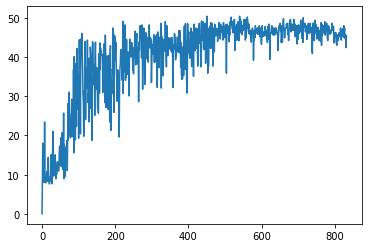

In [6]:
plt.plot(env.total_reward)
plt.show()

### Run simulation

In [7]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    inventory_levels.append(info["Inventory:"])
    
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 59 | Inventory: 7 | Action: 1 | Reward: 0.72 | 
Steps left: 58 | Inventory: 6 | Action: 0 | Reward: 0.76 | 
Steps left: 57 | Inventory: 10 | Action: 0 | Reward: 0.6 | 
Steps left: 56 | Inventory: 9 | Action: 0 | Reward: 0.64 | 
Steps left: 55 | Inventory: 8 | Action: 0 | Reward: 0.68 | 
Steps left: 54 | Inventory: 7 | Action: 0 | Reward: 0.72 | 
Steps left: 53 | Inventory: 6 | Action: 0 | Reward: 0.76 | 
Steps left: 52 | Inventory: 5 | Action: 0 | Reward: 0.8 | 
Steps left: 51 | Inventory: 4 | Action: 1 | Reward: 0.84 | 
Steps left: 50 | Inventory: 3 | Action: 0 | Reward: 0.88 | 
Steps left: 49 | Inventory: 7 | Action: 0 | Reward: 0.72 | 
Steps left: 48 | Inventory: 6 | Action: 0 | Reward: 0.76 | 
Steps left: 47 | Inventory: 5 | Action: 0 | Reward: 0.8 | 
Steps left: 46 | Inventory: 4 | Action: 1 | Reward: 0.84 | 
Steps left: 45 | Inventory: 3 | Action: 0 | Reward: 0.88 | 
Steps left: 44 | Inventory: 7 | Action: 0 | Reward: 0.72 | 
Steps left: 43 | Inventory: 6 | Action: 0 

###### Inventory level graph

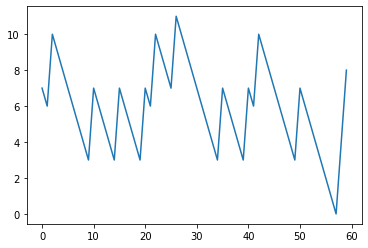

[7, 6, 10, 9, 8, 7, 6, 5, 4, 3, 7, 6, 5, 4, 3, 7, 6, 5, 4, 3, 7, 6, 10, 9, 8, 7, 11, 10, 9, 8, 7, 6, 5, 4, 3, 7, 6, 5, 4, 3, 7, 6, 10, 9, 8, 7, 6, 5, 4, 3, 7, 6, 5, 4, 3, 2, 1, 0, 4, 8]


In [8]:
plt.plot(inventory_levels)
plt.show()
print(inventory_levels)